IMPORT ALL THE LIBRARIES

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import umap
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


DEFINE THE DATASET

In [3]:

Table1 = 'https://raw.githubusercontent.com/Abdul-139/DNA-PCA/main/Table_1.csv'
Table2 = 'https://raw.githubusercontent.com/Abdul-139/DNA-PCA/main/Table_2%20(1).csv'

# Read the CSV files into DataFrames
df1 = pd.read_csv(Table1)
df2 = pd.read_csv(Table2)


In [4]:
df1.head()

,Code,Position,Latitute,Longitude,Tree age,Origin
0,Cri1N-2,Wenchang city of Hainan province,19.53,110.76,Eight years,China
1,Cri2S-2,Wenchang city of Hainan province,19.53,110.76,Eight years,China
2,Cri2S-3,Wenchang city of Hainan province,19.53,110.76,Eight years,China
3,Cri3N-1,Wenchang city of Hainan province,19.53,110.76,Eight years,China
4,Cri4S-2,Wenchang city of Hainan province,19.53,110.76,Eight years,China


In [5]:
df2.head(5)

,Cri20S-2,AGCGATAG-GTTTCGGA
0,Cri12S-12,CATTGACC-AGGCGAAG
1,Cri14S-13,ATCACGAC-GTGGCCTT
2,Cri19N-3,CTGAAGCT-GTACTGAC
3,Cri9S-1,ATGTCAGA-GGCTCTGA
4,Cri11S-10,GAATTCGT-TAAGTTCC


Initially, we have two tables of data that need to be merged into a single table. The first table (df1) contains information about various locations, including their position, latitude, longitude, tree age, and origin. The second table (df2) includes DNA sequence data linked to codes that correspond to the codes in the first table.

Steps to Merge the Tables:
1. Examine the Structure of Both Tables:
-   Table 1 (df1): This table contains columns for 'Code', 'Position', 'Latitude', 'Longitude', 'Tree age', and 'Origin'.
-   Table 2 (df2): This table has columns for 'Original_Code' and 'Sequence'. The 'Original_Code' in df2 corresponds to the 'Code' in df1.

2. Ensure Column Naming Consistency:
    Before merging, it's important to ensure that the column names in both tables are correctly identified and consistent for the merge operation. For instance, renaming columns if necessary to make sure they align.

3. Perform the Merge Operation:
    We use the pandas merge function to combine the tables. The merging is done on the 'Code' column in df1 and the 'Original_Code' column in df2. This ensures that the DNA sequence data from df2 is correctly aligned with the corresponding location data in df1.

4. Verify the Merged Table:
    After merging, we check the resulting table to ensure that all data from both tables has been correctly combined. The merged table now contains the original columns from df1 along with the 'Original_Code' and 'Sequence' columns from df2.

In [6]:

df1.columns = ['Code', 'Position', 'Latitute', 'Longitude', 'Tree_age', 'Origin']
df2.columns = ['Original_Code', 'Sequence']

# Merge Table 2 into Table 1 based on the 'Code' column
merged_table = pd.merge(df1, df2, left_on='Code', right_on='Original_Code')

# Display the merged table
print("\nMerged Table:")
merged_table.head(11)


Merged Table:


,Code,Position,Latitute,Longitude,Tree_age,Origin,Original_Code,Sequence
0,Cri1N-2,Wenchang city of Hainan province,19.53,110.76,Eight years,China,Cri1N-2,TCCGCGAA-GTTTCGGA
1,Cri2S-2,Wenchang city of Hainan province,19.53,110.76,Eight years,China,Cri2S-2,TCCTGAGC-CGTACGTA
2,Cri3N-1,Wenchang city of Hainan province,19.53,110.76,Eight years,China,Cri3N-1,ACCCAGCA-CGTACGTA
3,Cri4S-2,Wenchang city of Hainan province,19.53,110.76,Eight years,China,Cri4S-2,CGAGGCTG-GAGTGGAT
4,Cri4S-3,Wenchang city of Hainan province,19.53,110.76,Eight years,China,Cri4S-3,ACCCAGCA-GAGTGGAT
5,Cri5N-2,Wenchang city of Hainan province,19.53,110.76,Eight years,China,Cri5N-2,ATGTCAGA-GAGTGGAT
6,Cri5S-1,Wenchang city of Hainan province,19.53,110.76,Eight years,China,Cri5S-1,TAAGGCGA-ATTCCTTT
7,Cri5S-2,Wenchang city of Hainan province,19.53,110.76,Eight years,China,Cri5S-2,TCCTGAGC-ATTCCTTT
8,Cri6S-1,Wenchang city of Hainan province,19.53,110.76,Eight years,China,Cri6S-1,AGGGTCAA-ATTCCTTT
9,Cri6S-3,Wenchang city of Hainan province,19.53,110.76,Eight years,China,Cri6S-3,ACAGTGGT-TAAGACAC


In [7]:

# Load the CSV files from the provided URLs
table_1_path = 'https://raw.githubusercontent.com/Abdul-139/DNA-PCA/main/Table_1.csv'
table_2_path = 'https://raw.githubusercontent.com/Abdul-139/DNA-PCA/main/Table_2%20(1).csv'

table_1 = pd.read_csv(table_1_path, header=1)
table_2 = pd.read_csv(table_2_path)

# Renaming the columns for clarity
table_1.columns = ['Code', 'Position', 'Latitute', 'Longitude', 'Tree_age', 'Origin']
table_2.columns = ['Code', 'Sequence']

# Merge Table 2 into Table 1 based on the 'Code' column
merged_table = pd.merge(table_1, table_2, on='Code')

# Display the merged table
print("\nMerged Table:")
merged_table.head(10)



Merged Table:


,Code,Position,Latitute,Longitude,Tree_age,Origin,Sequence
0,Cri2S-2,Wenchang city of Hainan province,19.53,110.76,Eight years,China,TCCTGAGC-CGTACGTA
1,Cri3N-1,Wenchang city of Hainan province,19.53,110.76,Eight years,China,ACCCAGCA-CGTACGTA
2,Cri4S-2,Wenchang city of Hainan province,19.53,110.76,Eight years,China,CGAGGCTG-GAGTGGAT
3,Cri4S-3,Wenchang city of Hainan province,19.53,110.76,Eight years,China,ACCCAGCA-GAGTGGAT
4,Cri5N-2,Wenchang city of Hainan province,19.53,110.76,Eight years,China,ATGTCAGA-GAGTGGAT
5,Cri5S-1,Wenchang city of Hainan province,19.53,110.76,Eight years,China,TAAGGCGA-ATTCCTTT
6,Cri5S-2,Wenchang city of Hainan province,19.53,110.76,Eight years,China,TCCTGAGC-ATTCCTTT
7,Cri6S-1,Wenchang city of Hainan province,19.53,110.76,Eight years,China,AGGGTCAA-ATTCCTTT
8,Cri6S-3,Wenchang city of Hainan province,19.53,110.76,Eight years,China,ACAGTGGT-TAAGACAC
9,Cri7N-1,Wenchang city of Hainan province,19.53,110.76,Eight years,China,TATCGTCG-ATTCCTTT


In the next step, we refine the merged DataFrame by removing specific columns that contain string data, such as 'Code', 'Position', and 'Tree_age'. These columns are not required for our subsequent analysis. However, we retain the 'Origin' and 'Sequence' columns. Even though the 'Sequence' column contains string data, it is essential for the next steps in our analysis, which involve using K-mers to process the DNA sequence data.

To accomplish this, we use the drop method from pandas, specifying the columns to be removed and setting the appropriate parameters to indicate that we are dropping columns. After performing this operation, we verify the new DataFrame by displaying the first few rows to ensure that the specified columns have been successfully removed.

The resulting DataFrame retains only the 'Origin' and 'Sequence' columns, which are crucial for the next step of our analysis. This streamlined DataFrame ensures that we have a focused dataset, maintaining only the necessary information for efficient and accurate analysis.

In [8]:

# Drop the specified columns from the DataFrame
merged_table_new = merged_table.drop(['Code', 'Position', 'Tree_age'], axis=1)

# Display the DataFrame after dropping the columns
print("\nMerged Table after dropping columns:")
merged_table_new.head(10)


Merged Table after dropping columns:


,Latitute,Longitude,Origin,Sequence
0,19.53,110.76,China,TCCTGAGC-CGTACGTA
1,19.53,110.76,China,ACCCAGCA-CGTACGTA
2,19.53,110.76,China,CGAGGCTG-GAGTGGAT
3,19.53,110.76,China,ACCCAGCA-GAGTGGAT
4,19.53,110.76,China,ATGTCAGA-GAGTGGAT
5,19.53,110.76,China,TAAGGCGA-ATTCCTTT
6,19.53,110.76,China,TCCTGAGC-ATTCCTTT
7,19.53,110.76,China,AGGGTCAA-ATTCCTTT
8,19.53,110.76,China,ACAGTGGT-TAAGACAC
9,19.53,110.76,China,TATCGTCG-ATTCCTTT


In [9]:
# Define a dictionary that maps the country names to numbers
country_to_number = {'China': 1, 'Malaysia': 2, 'Costa Rica': 3, 'Africa': 4}

# Replace the country names with numbers in the 'origin' column
merged_table_new['Origin'] = merged_table_new['Origin'].replace(country_to_number)

# Display the DataFrame after replacing the country names
print("\nMerged Table after replacing country names with numbers:")
print(merged_table_new.head(25))


Merged Table after replacing country names with numbers:
    Latitute  Longitude  Origin           Sequence
0      19.53     110.76       1  TCCTGAGC-CGTACGTA
1      19.53     110.76       1  ACCCAGCA-CGTACGTA
2      19.53     110.76       1  CGAGGCTG-GAGTGGAT
3      19.53     110.76       1  ACCCAGCA-GAGTGGAT
4      19.53     110.76       1  ATGTCAGA-GAGTGGAT
5      19.53     110.76       1  TAAGGCGA-ATTCCTTT
6      19.53     110.76       1  TCCTGAGC-ATTCCTTT
7      19.53     110.76       1  AGGGTCAA-ATTCCTTT
8      19.53     110.76       1  ACAGTGGT-TAAGACAC
9      19.53     110.76       1  TATCGTCG-ATTCCTTT
10     19.53     110.76       1  GCTACGCT-ATAGAGGC
11     19.53     110.76       1  ACCCAGCA-ATAGAGGC
12     19.53     110.76       1  AGGGTCAA-ATAGAGGC
13     19.53     110.76       1  CTTCGTTC-ATAGAGGC
14     19.53     110.76       1  CTGAAGCT-CCTATCCT
15     19.53     110.76       1  TAGGCATG-AGCTGAAC
16     19.53     110.76       1  CGAGGCTG-GGCTCTGA
17     19.53     110.76 

In [10]:
# Remove hyphens from the 'Sequence' column
merged_table_new['Sequence'] = merged_table_new['Sequence'].str.replace('-', '')

# Display the DataFrame after removing hyphens
print("\nMerged Table after removing hyphens from 'Sequence':")
merged_table_new.head(10)


Merged Table after removing hyphens from 'Sequence':


,Latitute,Longitude,Origin,Sequence
0,19.53,110.76,1,TCCTGAGCCGTACGTA
1,19.53,110.76,1,ACCCAGCACGTACGTA
2,19.53,110.76,1,CGAGGCTGGAGTGGAT
3,19.53,110.76,1,ACCCAGCAGAGTGGAT
4,19.53,110.76,1,ATGTCAGAGAGTGGAT
5,19.53,110.76,1,TAAGGCGAATTCCTTT
6,19.53,110.76,1,TCCTGAGCATTCCTTT
7,19.53,110.76,1,AGGGTCAAATTCCTTT
8,19.53,110.76,1,ACAGTGGTTAAGACAC
9,19.53,110.76,1,TATCGTCGATTCCTTT


Finally we get the cleaned data and ready to be processing into next step

In [11]:
# Select only the 'Origin' and 'Sequence' columns
merged_table_new = merged_table_new[['Origin', 'Sequence']]

# Display the DataFrame after selecting the columns
print("\nMerged Table with only 'origin' and 'Sequence':")
merged_table_new.head(200)


Merged Table with only 'origin' and 'Sequence':


,Origin,Sequence
0,1,TCCTGAGCCGTACGTA
1,1,ACCCAGCACGTACGTA
2,1,CGAGGCTGGAGTGGAT
3,1,ACCCAGCAGAGTGGAT
4,1,ATGTCAGAGAGTGGAT
...,...,...
170,4,ATGTCAGAGTGGCCTT
171,4,CGGCTATGCAGGACGT
172,4,ACAGTGGTTAGGCATG
173,4,ACCCAGCATAGGCATG


The next step in our analysis involves transforming the DNA sequence data, which is currently in string format, into numerical data. This transformation is crucial for further computational analysis. To achieve this, we will use a technique called K-mers.

K-mers are short, overlapping substrings of a specified length (k) derived from the DNA sequence. By breaking down the DNA sequence into these smaller units, we can quantify the sequence data in a manner that is more suitable for numerical analysis and computational modeling.


1. Understanding K-mers:
    K-mers are contiguous sequences of 'k' nucleotides from a longer DNA sequence. For example, if we set k=3, we will extract every possible substring of length 3 from the DNA sequence. These K-mers can then be counted to create a numerical representation of the sequence.

2. Generating K-mers:
    We need a method to generate these K-mers from the DNA sequences. This involves sliding a window of length k across the sequence and extracting each substring of k nucleotides. This method ensures that all possible K-mers are captured, providing a comprehensive numerical representation of the sequence.

3. Converting to Numerical Data:
    Once the K-mers are generated, we can count their occurrences within each DNA sequence. This count data can then be represented in a numerical matrix where each row corresponds to a DNA sequence, and each column represents a specific K-mer. The value in each cell of the matrix indicates the frequency of that K-mer in the corresponding DNA sequence.

4. Vectorization Process:
    We utilize a vectorization process, which converts the sequences into numerical data by counting the occurrences of each possible K-mer. This step involves creating a vector space where each unique K-mer represents a dimension, and the sequences are transformed into vectors in this space based on their K-mer counts. This numerical representation allows for more efficient data processing and analysis.

5. Application and Utility:
    The resulting numerical data can be used for various downstream analyses, such as machine learning models, statistical analysis, and other computational methods. This transformation from string data to numerical data is essential for leveraging computational tools that require numerical input. By converting the DNA sequence data into numerical form using K-mers, we can effectively prepare our dataset for further analysis, ensuring that it is compatible with various computational techniques. This process enhances our ability to perform detailed and accurate analyses on the genetic information contained within the sequences.

   

In [12]:


# Define a function to generate k-mers
def generate_kmers(sequence, k=3):
    return [sequence[i:i+k] for i in range(len(sequence)-k+1)]

# Create a CountVectorizer for k-mers
k = 3
vectorizer = CountVectorizer(analyzer=lambda x: generate_kmers(x, k))

# Transform the sequences into k-mer counts
X_kmers = vectorizer.fit_transform(merged_table_new['Sequence'])

# Convert to a DataFrame
X_kmers_df = pd.DataFrame(X_kmers.toarray(), columns=vectorizer.get_feature_names_out())

# Display the first few rows
X_kmers_df.head(175)


,AAA,AAC,AAG,AAT,ACA,ACC,ACG,ACT,AGA,AGC,...,TCG,TCT,TGA,TGC,TGG,TGT,TTA,TTC,TTG,TTT
0,0,0,0,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,1,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
3,0,0,0,0,0,1,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0
171,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
172,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
173,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In this scenario, our objective is to experiment with various dimensionality reduction and clustering algorithms to achieve optimal clustering results. The approaches we plan to implement include:


1. PCA & UMAP with Fine-tuned K-means: 
    Combining PCA and UMAP for dimensionality reduction, followed by K-means clustering with parameters fine-tuned for better performance.
2. PCA & UMAP with Agglomerative Clustering: 
    Applying PCA and UMAP, then using agglomerative clustering, a hierarchical method that builds clusters by merging smaller ones.
3. PCA & UMAP with GMM (Gaussian Mixture Models): 
    Using PCA and UMAP for dimensionality reduction and then clustering the data with GMM, which assumes that the data is generated from a mixture of several Gaussian distributions.
4. Anomaly Reduction: 
    Incorporating anomaly detection and reduction techniques to improve the quality of clustering by removing outliers and noise from the data.
    
The goal is to determine which combination of these methods yields the most effective clustering results, potentially enhancing the clustering quality by using these varied approaches.

C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


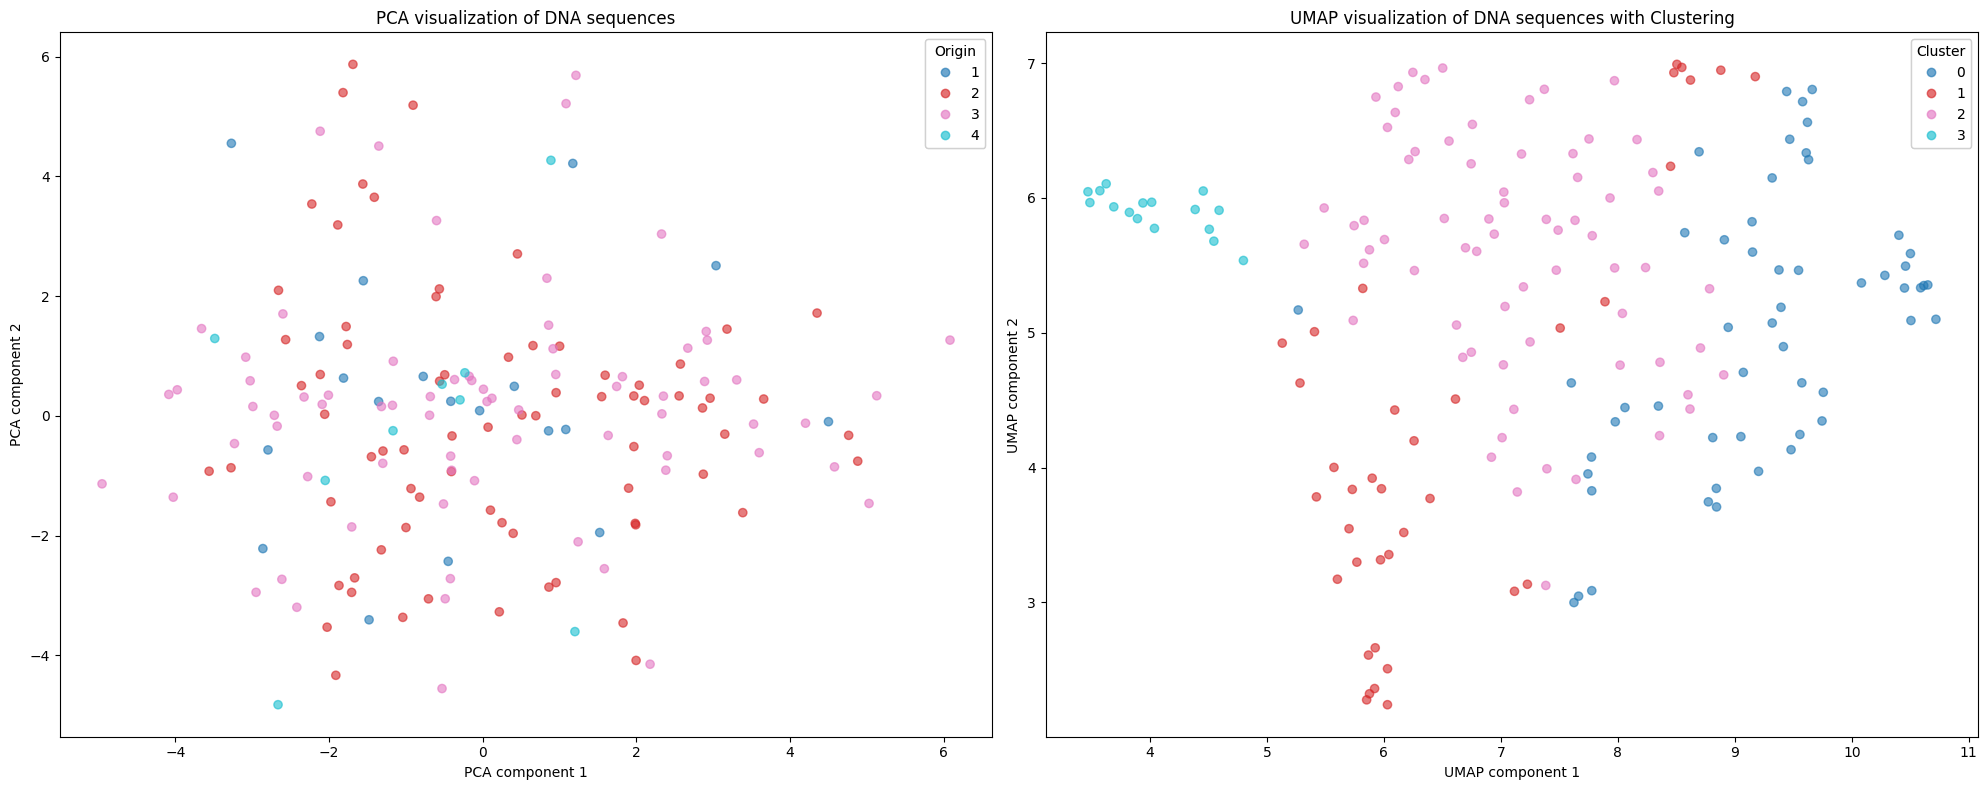

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Assuming X_kmers_df is your original high-dimensional data and merged_table_new contains the origin labels

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_kmers_df)

# Apply PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(X_pca, columns=['PCA 1', 'PCA 2'])
pca_df['Origin'] = merged_table_new['Origin']

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # Assuming there are 4 clusters based on the 'Origin'
clusters = kmeans.fit_predict(X_scaled)

# Apply UMAP for visualization
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_scaled)

# Create a DataFrame for the UMAP results
umap_df = pd.DataFrame(X_umap, columns=['UMAP 1', 'UMAP 2'])
umap_df['Cluster'] = clusters


# Apply the mapping to the DataFrames
pca_df['Cluster'] = clusters
pca_df['Origin_Label'] = pca_df['Cluster'].map(cluster_to_origin)
umap_df['Origin_Label'] = umap_df['Cluster'].map(cluster_to_origin)

# Plot PCA and UMAP results side by side
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot PCA
scatter_pca = axes[0].scatter(pca_df['PCA 1'], pca_df['PCA 2'], c=pca_df['Origin'], cmap='tab10', alpha=0.6)
axes[0].set_title("PCA visualization of DNA sequences")
axes[0].set_xlabel("PCA component 1")
axes[0].set_ylabel("PCA component 2")
legend1 = axes[0].legend(*scatter_pca.legend_elements(), title="Origin")
axes[0].add_artist(legend1)

# Plot UMAP
scatter_umap = axes[1].scatter(umap_df['UMAP 1'], umap_df['UMAP 2'], c=umap_df['Cluster'], cmap='tab10', alpha=0.6)
axes[1].set_title("UMAP visualization of DNA sequences with Clustering")
axes[1].set_xlabel("UMAP component 1")
axes[1].set_ylabel("UMAP component 2")
legend2 = axes[1].legend(*scatter_umap.legend_elements(), title="Cluster")
axes[1].add_artist(legend2)

plt.tight_layout()
plt.show()

C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


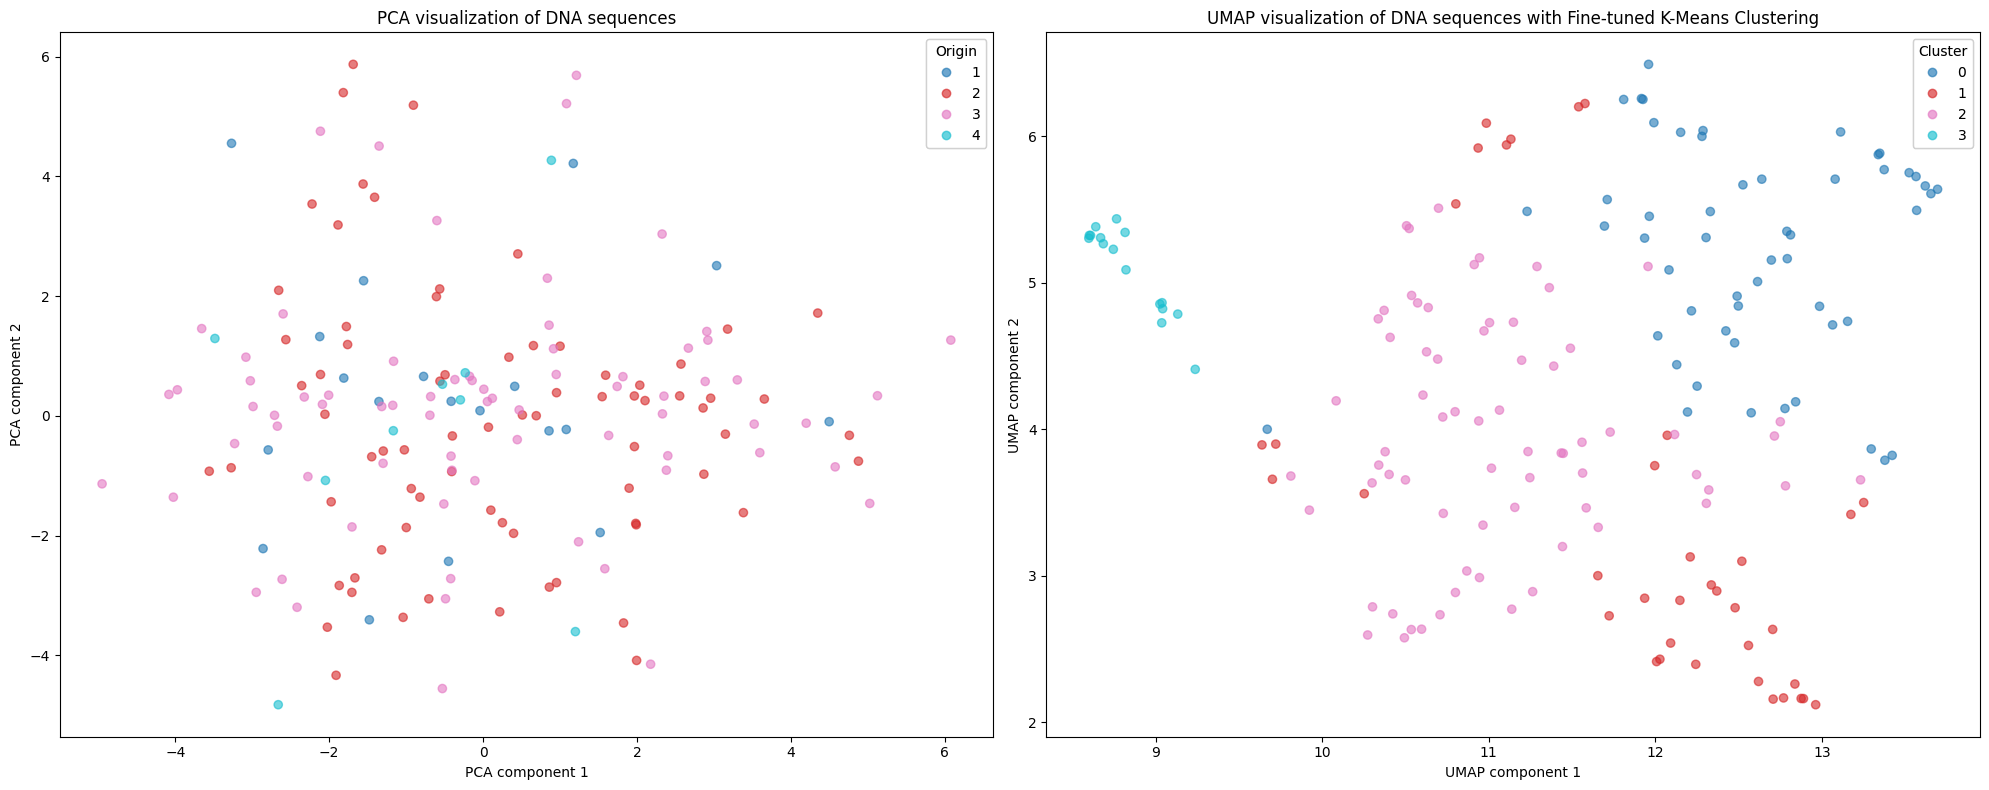

In [50]:


# Apply PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(X_pca, columns=['PCA 1', 'PCA 2'])
pca_df['Origin'] = merged_table_new['Origin']

# Apply K-Means Clustering with more clusters if necessary
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Apply UMAP for visualization with fine-tuned parameters
umap_model = umap.UMAP(n_components=2, random_state=42, n_neighbors=30, min_dist=0.0)
X_umap = umap_model.fit_transform(X_scaled)

# Create a DataFrame for the UMAP results
umap_df = pd.DataFrame(X_umap, columns=['UMAP 1', 'UMAP 2'])
umap_df['Cluster'] = clusters


# Apply the mapping to the DataFrames
pca_df['Cluster'] = clusters
pca_df['Origin_Label'] = pca_df['Cluster'].map(cluster_to_origin)
umap_df['Origin_Label'] = umap_df['Cluster'].map(cluster_to_origin)

# Plot PCA and UMAP results side by side
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot PCA
scatter_pca = axes[0].scatter(pca_df['PCA 1'], pca_df['PCA 2'], c=pca_df['Origin'], cmap='tab10', alpha=0.6)
axes[0].set_title("PCA visualization of DNA sequences")
axes[0].set_xlabel("PCA component 1")
axes[0].set_ylabel("PCA component 2")
legend1 = axes[0].legend(*scatter_pca.legend_elements(), title="Origin")
axes[0].add_artist(legend1)

# Plot UMAP
scatter_umap = axes[1].scatter(umap_df['UMAP 1'], umap_df['UMAP 2'], c=umap_df['Cluster'], cmap='tab10', alpha=0.6)
axes[1].set_title("UMAP visualization of DNA sequences with Fine-tuned K-Means Clustering")
axes[1].set_xlabel("UMAP component 1")
axes[1].set_ylabel("UMAP component 2")
legend2 = axes[1].legend(*scatter_umap.legend_elements(), title="Cluster")
axes[1].add_artist(legend2)

plt.tight_layout()
plt.show()

In the provided code, the clustering function, specifically using Gaussian Mixture Models (GMM), is employed to identify groups or clusters within the data based on the transformed features from PCA and UMAP. Here’s a detailed explanation of each step and the role of clustering:


Dimensionality Reduction with PCA and UMAP:

1. PCA (Principal Component Analysis): 
    Reduces the dimensionality of the data while retaining most of the variance. The result is a 2-dimensional dataset that is easier to visualize and analyze.
2. UMAP (Uniform Manifold Approximation and Projection): 
    Another dimensionality reduction technique that preserves both local and global structure of the data. It can capture non-linear relationships and often provides better clustering separations.

Clustering with GMM (Gaussian Mixture Models):

1. GMM on PCA Results: 
    After reducing the dimensionality with PCA, GMM is applied to the 2D PCA-transformed data. GMM assumes that the data is generated from a mixture of several Gaussian distributions and estimates the parameters of these distributions to assign each data point to a cluster.
2. GMM on UMAP Results: 
    Similarly, GMM is applied to the 2D UMAP-transformed data to find clusters within the data.

PCA and UMAP are applied to the original feature matrix X_kmers_df to obtain 2D representations.

In [18]:
# Apply PCA
pca_model = PCA(n_components=2, random_state=42)
X_pca = pca_model.fit_transform(X_kmers_df)

# Apply UMAP
umap_model = umap.UMAP(n_components=2, random_state=42, n_neighbors=100, min_dist=0.0)
X_umap = umap_model.fit_transform(X_kmers_df)


C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


GMM Clustering is performed on the PCA and UMAP results, where 'n_components=4' specifies that we expect to find 4 clusters in the data.

In [19]:
# Apply Gaussian Mixture Models (GMM) Clustering on PCA
gmm_pca = GaussianMixture(n_components=4, random_state=42)
clusters_pca = gmm_pca.fit_predict(X_pca)

# Apply Gaussian Mixture Models (GMM) Clustering on UMAP
gmm_umap = GaussianMixture(n_components=4, random_state=42)
clusters_umap = gmm_umap.fit_predict(X_umap)


DataFrames Creation: The transformed data along with the assigned cluster labels and original labels are stored in DataFrames for easier manipulation and plotting.

In [20]:
# Create DataFrames for the results
pca_df = pd.DataFrame(X_pca, columns=['Component 1', 'Component 2'])
pca_df['Cluster'] = clusters_pca
pca_df['Origin'] = merged_table_new['Origin']

umap_df = pd.DataFrame(X_umap, columns=['Component 1', 'Component 2'])
umap_df['Cluster'] = clusters_umap
umap_df['Origin'] = merged_table_new['Origin']


1. Cluster Mapping: 
    Clusters identified by GMM are mapped to their corresponding country names for meaningful interpretation.

2. Visualization: 
    The PCA and UMAP results are plotted side by side, with points colored by their GMM-assigned clusters and annotated with custom legends that display the country names.

3. Function of Clustering:
- Pattern Recognition: 
    Clustering helps to identify natural groupings in the data, which can reveal underlying patterns or structures.
- Dimensionality Reduction Synergy: 
    Combining dimensionality reduction (PCA/UMAP) with clustering (GMM) makes it easier to visualize and interpret high-dimensional data.
- Data Labeling: 
    Clustering can be used to assign labels to new, unlabeled data based on learned distributions.
- Comparison of Methods: 
    By comparing clustering results on PCA and UMAP transformations, one can assess the impact of different dimensionality reduction techniques on the clustering outcome.

In [21]:
# Map cluster numbers to origins
cluster_to_origin = {
    0: 'China',
    1: 'Malaysia',
    2: 'Costa Rica',
    3: 'Africa'
}

# Apply the mapping to the DataFrames
pca_df['Origin_Label'] = pca_df['Cluster'].map(cluster_to_origin)
umap_df['Origin_Label'] = umap_df['Cluster'].map(cluster_to_origin)


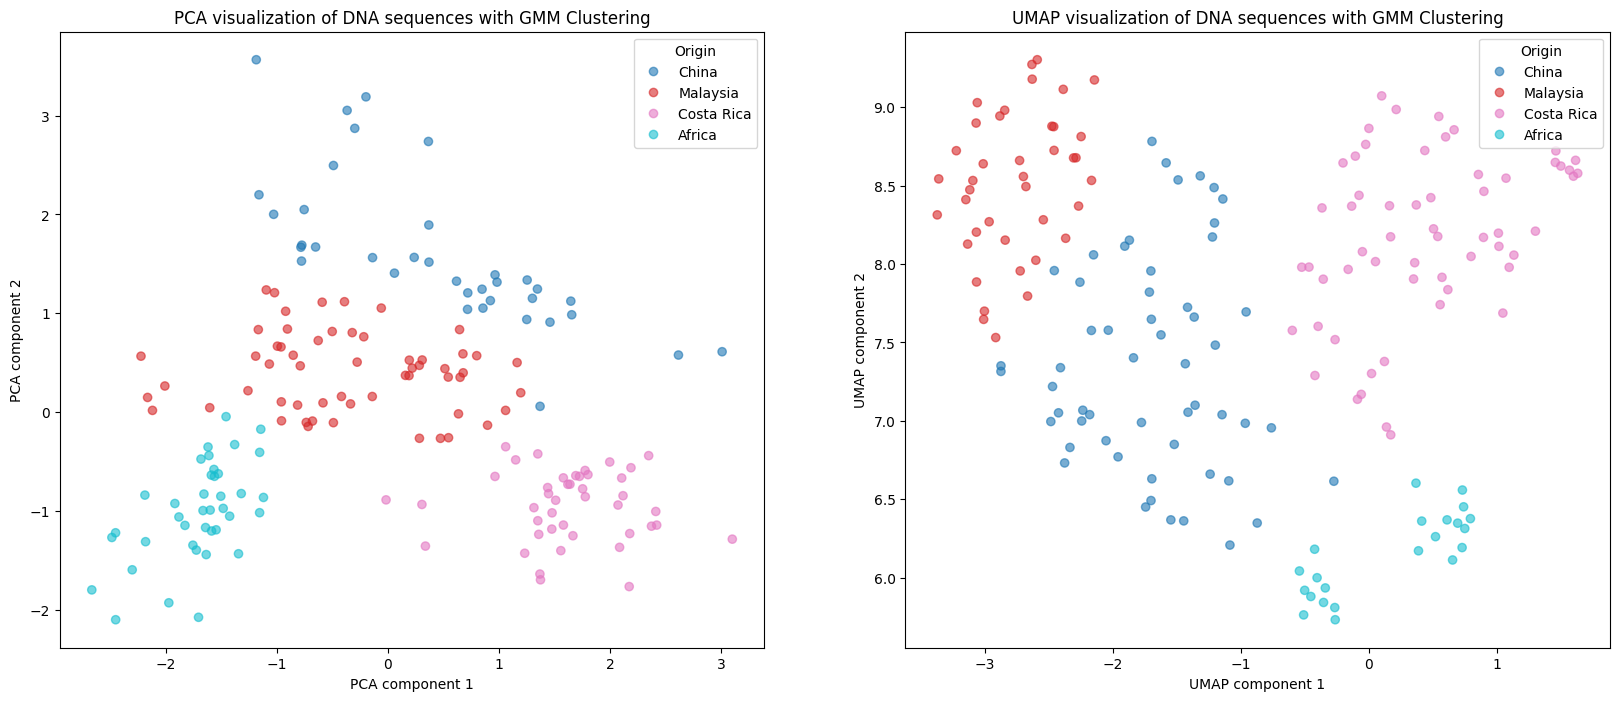

In [22]:
# Plot the PCA and UMAP results with cluster labels and custom legend
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

# PCA Plot
scatter_pca = ax[0].scatter(pca_df['Component 1'], pca_df['Component 2'], c=pca_df['Cluster'], cmap='tab10', alpha=0.6)
handles_pca, labels_pca = scatter_pca.legend_elements(prop="colors", alpha=0.6)
custom_labels_pca = [cluster_to_origin[i] for i in range(4)]
ax[0].legend(handles_pca, custom_labels_pca, title="Origin")
ax[0].set_title("PCA visualization of DNA sequences with GMM Clustering")
ax[0].set_xlabel("PCA component 1")
ax[0].set_ylabel("PCA component 2")

# UMAP Plot
scatter_umap = ax[1].scatter(umap_df['Component 1'], umap_df['Component 2'], c=umap_df['Cluster'], cmap='tab10', alpha=0.6)
handles_umap, labels_umap = scatter_umap.legend_elements(prop="colors", alpha=0.6)
custom_labels_umap = [cluster_to_origin[i] for i in range(4)]
ax[1].legend(handles_umap, custom_labels_umap, title="Origin")
ax[1].set_title("UMAP visualization of DNA sequences with GMM Clustering")
ax[1].set_xlabel("UMAP component 1")
ax[1].set_ylabel("UMAP component 2")

plt.show()


1. Anomaly Detection with Isolation Forest:
    Isolation Forest on PCA and UMAP Results: Detects anomalies in the data based on the reduced dimensions obtained from PCA and UMAP.
2. Isolation Forest: 
    An unsupervised learning algorithm used for anomaly detection. It isolates observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature. The process is repeated recursively until all the observations are isolated. The number of splits required to isolate a sample is used as an anomaly score.
3. 'contamination=0.1' specifies that 10% of the data is expected to be anomalies.

In [28]:
# Apply Isolation Forest for anomaly detection
iso_forest_pca = IsolationForest(random_state=42, contamination=0.1)
anomalies_pca = iso_forest_pca.fit_predict(X_pca)

iso_forest_umap = IsolationForest(random_state=42, contamination=0.1)
anomalies_umap = iso_forest_umap.fit_predict(X_umap)


1. DataFrames Creation: 
    DataFrames are created to store the PCA and UMAP results, including cluster labels, origin labels, and anomaly labels.
2. 'anomalies_pca' and 'anomalies_umap' contain the results from the Isolation Forest, where '-1' indicates an anomaly and '1' indicates a normal point.

In [30]:
# Create DataFrames for the results
pca_df = pd.DataFrame(X_pca, columns=['Component 1', 'Component 2'])
pca_df['Cluster'] = clusters_pca
pca_df['Origin'] = merged_table_new['Origin']
pca_df['Anomaly'] = anomalies_pca

umap_df = pd.DataFrame(X_umap, columns=['Component 1', 'Component 2'])
umap_df['Cluster'] = clusters_umap
umap_df['Origin'] = merged_table_new['Origin']
umap_df['Anomaly'] = anomalies_umap


Cluster Mapping: Maps the cluster numbers to their corresponding country names for meaningful interpretation.

In [31]:
# Map cluster numbers to origins
cluster_to_origin = {
    0: 'China',
    1: 'Malaysia',
    2: 'Costa Rica',
    3: 'Africa'
}

# Apply the mapping to the DataFrames
pca_df['Origin_Label'] = pca_df['Cluster'].map(cluster_to_origin)
umap_df['Origin_Label'] = umap_df['Cluster'].map(cluster_to_origin)


1. Visualization: 
    The PCA and UMAP results are plotted side by side, showing clusters and anomalies.
- Points colored by cluster labels are displayed using a scatter plot.
- Anomalies are marked with red 'x' markers.
- Legends are added to distinguish between clusters and anomalies.

2. Function of Anomaly Detection:
- Identify Outliers: 
    Anomaly detection helps to identify data points that significantly differ from the majority of the data, which might be errors, noise, or novel information.
- Data Quality: 
    Detecting anomalies ensures data quality by identifying unusual patterns that may require further investigation.
- Complement Clustering: 
    While clustering groups similar data points, anomaly detection highlights points that do not fit well into any cluster, providing additional insights into the dataset.
- Risk Management: 
    In many applications, such as fraud detection or fault detection, identifying anomalies is crucial for mitigating risks and taking preventive actions.

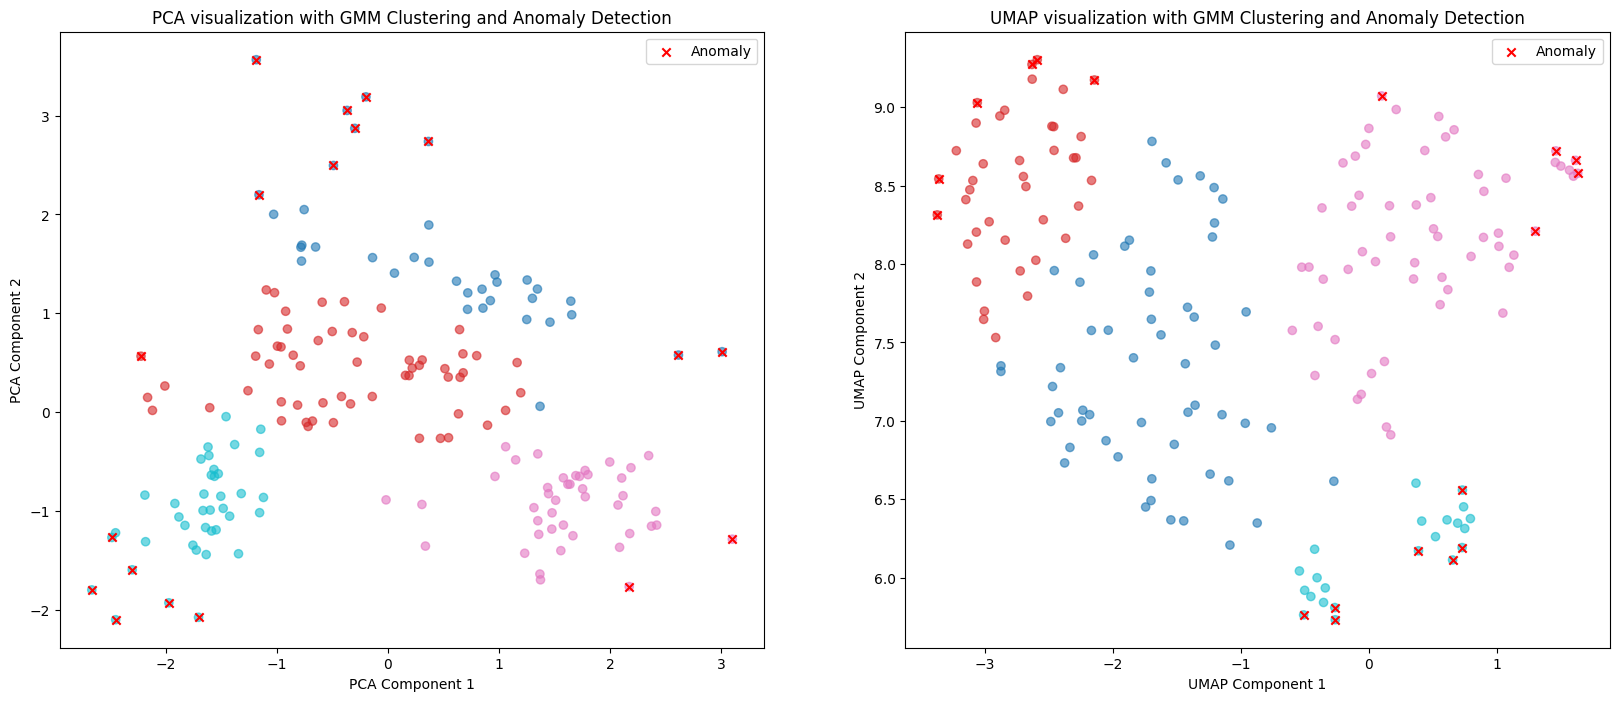

In [32]:
# Plot the PCA results with anomalies
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

axes[0].scatter(pca_df['Component 1'], pca_df['Component 2'], c=pca_df['Cluster'], cmap='tab10', alpha=0.6)
axes[0].scatter(pca_df.loc[pca_df['Anomaly'] == -1, 'Component 1'], pca_df.loc[pca_df['Anomaly'] == -1, 'Component 2'], c='red', marker='x', label='Anomaly')
axes[0].set_title("PCA visualization with GMM Clustering and Anomaly Detection")
axes[0].set_xlabel("PCA Component 1")
axes[0].set_ylabel("PCA Component 2")
axes[0].legend()

# Plot the UMAP results with anomalies
axes[1].scatter(umap_df['Component 1'], umap_df['Component 2'], c=umap_df['Cluster'], cmap='tab10', alpha=0.6)
axes[1].scatter(umap_df.loc[umap_df['Anomaly'] == -1, 'Component 1'], umap_df.loc[umap_df['Anomaly'] == -1, 'Component 2'], c='red', marker='x', label='Anomaly')
axes[1].set_title("UMAP visualization with GMM Clustering and Anomaly Detection")
axes[1].set_xlabel("UMAP Component 1")
axes[1].set_ylabel("UMAP Component 2")
axes[1].legend()

plt.show()


Removing Anomalies: Filters out data points marked as anomalies ('Anomaly != -1'). This results in cleaned datasets ('pca_df_cleaned' and 'umap_df_cleaned') that exclude the anomalous points identified by the Isolation Forest.

In [34]:
# Remove anomalies
pca_df_cleaned = pca_df[pca_df['Anomaly'] != -1]
umap_df_cleaned = umap_df[umap_df['Anomaly'] != -1]


Mapping Clusters to Origins: Maps the cluster numbers to country names for meaningful interpretation. This step ensures that the cleaned data retains the origin labels for better visualization and analysis.

In [35]:
# Map cluster numbers to origins
cluster_to_origin = {
    0: 'China',
    1: 'Malaysia',
    2: 'Costa Rica',
    3: 'Africa'
}

# Apply the mapping to the cleaned DataFrames
pca_df_cleaned['Origin_Label'] = pca_df_cleaned['Cluster'].map(cluster_to_origin)
umap_df_cleaned['Origin_Label'] = umap_df_cleaned['Cluster'].map(cluster_to_origin)


C:\Users\Abdul\AppData\Local\Temp\ipykernel_23024\1696158645.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pca_df_cleaned['Origin_Label'] = pca_df_cleaned['Cluster'].map(cluster_to_origin)
C:\Users\Abdul\AppData\Local\Temp\ipykernel_23024\1696158645.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  umap_df_cleaned['Origin_Label'] = umap_df_cleaned['Cluster'].map(cluster_to_origin)


1. Visualization of Cleaned Data:
- PCA Plot: 
    Visualizes the PCA results after removing anomalies. Clusters are colored based on their labels, and anomalies are excluded from the plot.
- UMAP Plot: 
    Visualizes the UMAP results after removing anomalies, with clusters colored similarly and anomalies excluded.
2. Function of Removing Anomalies:
- Clean Data Analysis: 
    Removing anomalies allows for a more accurate analysis of the core data structure without the distortion caused by outliers.
- Improved Clustering: 
    Clusters become clearer and more defined without the interference of anomalous data points.
- Better Visualization: 
    Plots without anomalies provide a clearer view of the underlying patterns and relationships within the data.
- Enhanced Interpretability: 
    Removing anomalies helps to focus on the main data trends and groupings, making the results easier to interpret and understand.

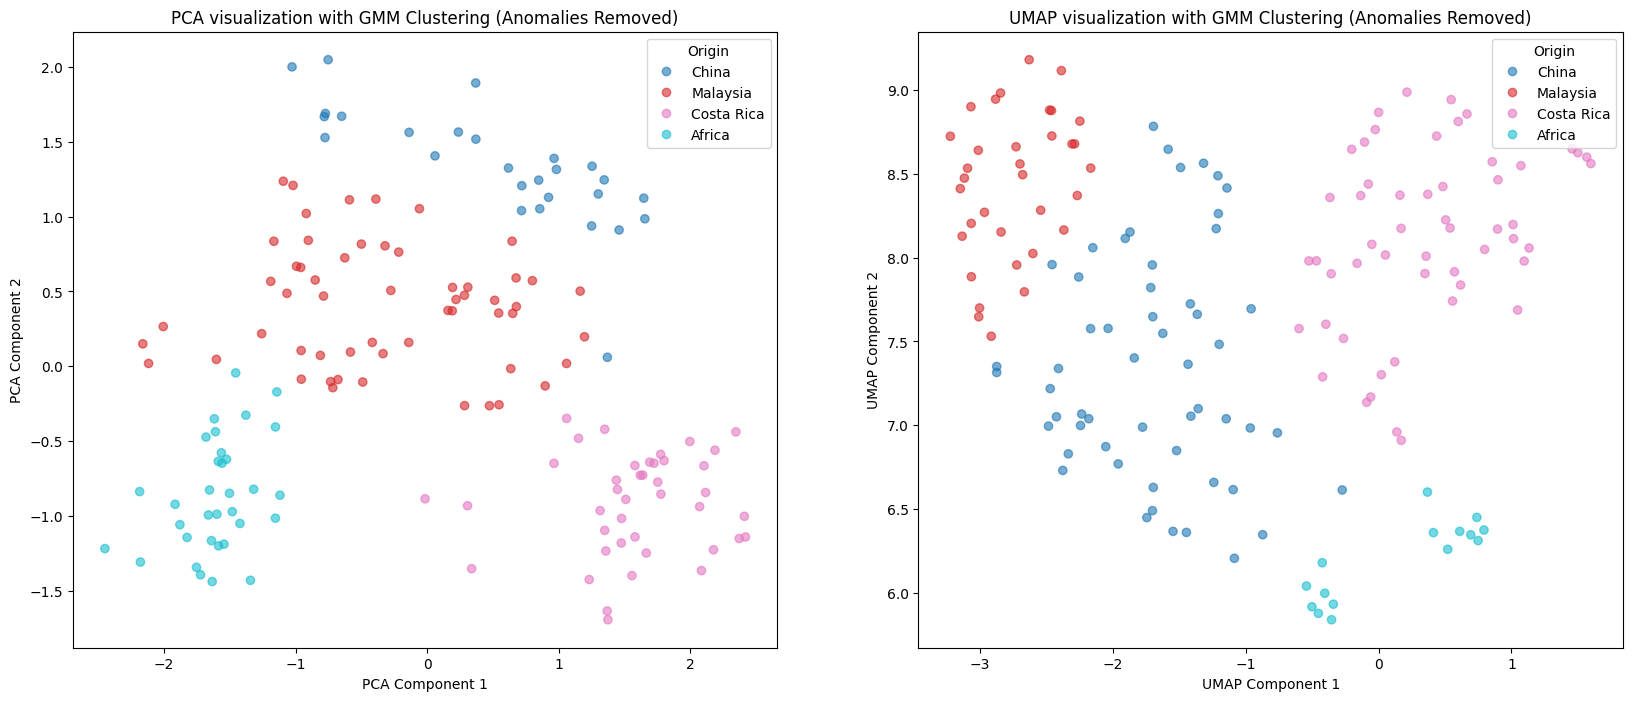

In [36]:
# Plot the PCA results without anomalies
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

axes[0].scatter(pca_df_cleaned['Component 1'], pca_df_cleaned['Component 2'], c=pca_df_cleaned['Cluster'], cmap='tab10', alpha=0.6)
axes[0].legend(handles_pca, custom_labels_pca, title="Origin")
axes[0].set_title("PCA visualization with GMM Clustering (Anomalies Removed)")
axes[0].set_xlabel("PCA Component 1")
axes[0].set_ylabel("PCA Component 2")

# Plot the UMAP results without anomalies
axes[1].scatter(umap_df_cleaned['Component 1'], umap_df_cleaned['Component 2'], c=umap_df_cleaned['Cluster'], cmap='tab10', alpha=0.6)
axes[1].legend(handles_umap, custom_labels_umap, title="Origin")
axes[1].set_title("UMAP visualization with GMM Clustering (Anomalies Removed)")
axes[1].set_xlabel("UMAP Component 1")
axes[1].set_ylabel("UMAP Component 2")

plt.show()


In [25]:
pca_df_cleaned

,Component 1,Component 2,Cluster,Origin,Anomaly,Origin_Label
0,0.716337,1.040471,0,1,1,China
1,1.653719,0.985597,0,1,1,China
3,1.476791,-1.017653,2,1,1,Costa Rica
4,-1.598814,-0.989546,3,1,1,Africa
5,-0.957341,-0.086795,1,1,1,Malaysia
...,...,...,...,...,...,...
170,-1.565107,-0.578741,3,4,1,Africa
171,-1.456098,-0.044764,3,4,1,Africa
172,-1.503369,-0.849392,3,4,1,Africa
173,1.356979,-1.235168,2,4,1,Costa Rica


In [51]:
pca_banding = pca_df_cleaned.groupby(['Cluster', 'Origin_Label']).size().unstack(fill_value=0)
print(pca_banding)

Origin_Label  Africa  China  Costa Rica  Malaysia
Cluster                                          
0                  0     53           0         0
1                  0      0           0        37
2                  0      0          69         0
3                 16      0           0         0
